# Descomposición LU de una matriz

Comenzaramos escribiendo las funciones necesarias para crear la matriz $A$ y los vectores $\vec b$ y $\vec x$, de dimensión $N$.

In [1]:
import numpy as np
import scipy.linalg   # SciPy Linear Algebra Library

def crea_matrices(N = 10):
    A = np.random.rand(N,N)
    x = np.random.rand(N)
    b = A@x
    return A, x, b

#A, x, b = crea_matrices(3)


### _Foward_ y _backward substitution_
Escribamos las funciones necesarias para resolver el sistema de ecuaciones original, una vez que tengamos las matrices L y U.


In [12]:
def forward_subs(L,b):
    y = np.zeros_like(b)
    for i in range(b.size):
        y[i] = b[i]
        for j in range(i):
            y[i]=y[i]-(L[i,j]*y[j])
        y[i]=y[i]/L[i,i]
    return y


def back_subs(U,y):
    x=np.zeros_like(y)
    for i in range(x.size,0,-1):
         x[i-1]=(y[i-1]-np.dot(U[i-1,i:],x[i:]))/U[i-1,i-1]          
    return x


def solve_system_LU(L,U,b):
    y=forward_subs(L,b)
    x=back_subs(U,y)
    return x



### LU + solución

In [8]:
def LU1(A):
    N = A.shape[0]
    U = A.copy() #  copiamos A en U, guardaremos en U las matrices intermedias A(k)
    L = np.eye(N,N) # L comienza siendo la matriz identidad de n×n
    for k in range(N-1):#  loop sobre "columnas a eliminar"
        for i in range(k+1, N): # recorre elementos por debajo de la diagonal
            L[i,k] = -U[i,k] / U[k,k] # calcula el coeficiente
            # opera sobre la fila i, recorriendo con j todos los coeficientes
            for j in range(N):
                U[i,j] = U[i,j] + L[i,k] * U[k,j]
            L[i,k] = -L[i,k] # para que queden los coeficientes de L−1
    return L, U


In [13]:
A, x, b = crea_matrices(3)
L, U = LU1(A)
y = solve_system_LU(L,U, b)
print('x real:', x)
print('x encontrado:', y)

x real: [0.51686292 0.30566594 0.03353372]
x encontrado: [0.51686292 0.30566594 0.03353372]


In [84]:
import time

iters = 10 # iteraciones para mejorar la estadistica
N = np.logspace(1,2,20).astype(int)
times = np.zeros(N.size)

for i in range(iters):
    for j, n in enumerate(N):  
        A, x, b = crea_matrices(n)
        start = time.time() 
        L, U = LU1(A)
        times[j] +=( time.time()-start) /iters


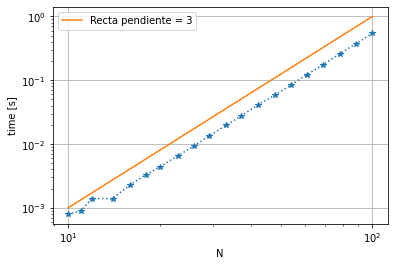

In [85]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.loglog(N, times, '*:')
ax.loglog(N, N**3/(N[-1]**3), label = 'Recta pendiente = 3')
ax.set_xlabel('N')
ax.set_ylabel('time [s]')
ax.grid()
ax.legend()